<a href="https://colab.research.google.com/github/maryandy2002/maryandy2002/blob/main/InterpolacionLagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolacion y polinomio de Lagrange
Se utiliza para determinar un polinomio que pase por diferentes puntos $(x_0,f(x_0)),(x_1,f(x_1)),...(x_n,f(x_n))$


Primero para cada $k=0,1,...n$ construimos una funcion $L_{n,k}(x)$ de la siguiente manera: $L_{n,k}(x)=\frac{(x-x_0)...(x-x_{k-1})(x-x_{k+1})...(x-x_n)}{(x_k-x_0)...(x_k-x_{k-1})(x_k-x_{k+1})...(x_k-x_n)}$.

Una vez que se conocen los $L_{n,k}$ es fácil determinar el polinnomio de interpolación como se describe a continuación: $P(x)=\sum_{k=0}^{n}f(x_k)L_{n,k}(x)$

A continuación, se presenta un código que realiza el método descrito anteriormente

In [9]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def polinomio(a,b):
  x=sp.symbols("x")
  l=[]
  t=1
  d=1
  f=0
  for i in range(len(a)):
   for j in range(len(a)):
    if i!=j:
     t*=(x-a[j])
     d*=(a[i]-a[j])
     t=sp.expand(t)
   l.append(t/d)
   t=1
   d=1

  for i in range(len(a)):
   f+=l[i]*b[i]

  gf=sp.lambdify(x,f,'numpy')
  xx=np.linspace(0,1,1000)
  yl=np.log(xx+1)
  yf=gf(xx)
  plt.plot(xx,yl,xx,yf)
  plt.scatter(a,b)
  plt.legend(['ln(x)','Polinomio'])
  plt.title('Polinomio de interpolación')
  plt.grid(True)
  return f

-0.234074074074074*x**2 + 0.923777777777778*x

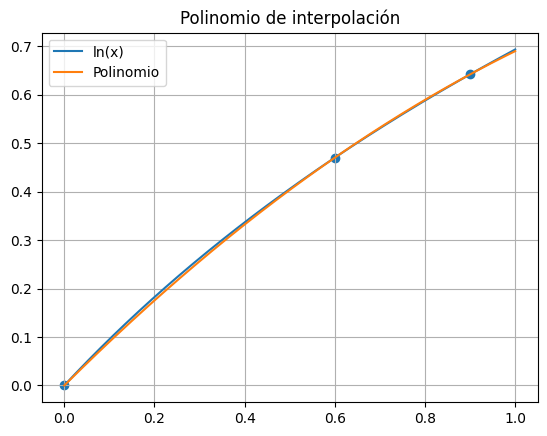

In [10]:
a=[0,0.6,0.9]
b=[0,0.47,0.6418]
f=polinomio(a,b)
sp.expand(f)